In [1]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/lib/python3.7/site-packages (0.0)


In [2]:
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [4]:
df = pd.read_csv("data/exoplanet_data.csv")
df = df.dropna(axis='columns', how='all')
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
selected_features = df.drop(columns=["koi_disposition",
                            "koi_period_err1", 
                            "koi_period_err2",
                            "koi_time0bk_err1",
                            "koi_time0bk_err2",
                            "koi_steff_err1",
                            "koi_steff_err2",
                            "koi_slogg_err1",
                            "koi_slogg_err2",
                            "koi_srad_err1",
                            "koi_srad_err2"],
                            axis=1)

In [6]:
y = df["koi_disposition"]
X = selected_features

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,0.305,-0.150,3.61600,...,204.89,-103.87,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,0.193,-0.291,2.30900,...,2253.61,-677.78,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,0.879,-0.942,79.89690,...,195.16,-64.34,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,0.145,-0.300,2.63120,...,7.15,-10.12,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,0.016,-0.004,2.22739,...,146.52,-93.21,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(y_train) 

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_test_encoded

array([2, 0, 2, ..., 1, 1, 1])

In [11]:
code=pd.DataFrame({"Actual": y_test, "Encoded": y_test_encoded})
code.head()

,Actual,Encoded
4982,FALSE POSITIVE,2
4866,CANDIDATE,0
2934,FALSE POSITIVE,2
5007,FALSE POSITIVE,2
3869,FALSE POSITIVE,2


k: 1, Train/Test Score: 1.000/0.782
k: 3, Train/Test Score: 0.890/0.791
k: 5, Train/Test Score: 0.868/0.796
k: 7, Train/Test Score: 0.853/0.803
k: 9, Train/Test Score: 0.847/0.798
k: 11, Train/Test Score: 0.845/0.805
k: 13, Train/Test Score: 0.842/0.809
k: 15, Train/Test Score: 0.835/0.808
k: 17, Train/Test Score: 0.834/0.807
k: 19, Train/Test Score: 0.831/0.805
k: 21, Train/Test Score: 0.830/0.807
k: 23, Train/Test Score: 0.830/0.805
k: 25, Train/Test Score: 0.826/0.804
k: 27, Train/Test Score: 0.826/0.802
k: 29, Train/Test Score: 0.825/0.808
k: 31, Train/Test Score: 0.824/0.807
k: 33, Train/Test Score: 0.826/0.805
k: 35, Train/Test Score: 0.825/0.804
k: 37, Train/Test Score: 0.822/0.804
k: 39, Train/Test Score: 0.821/0.804
k: 41, Train/Test Score: 0.821/0.802
k: 43, Train/Test Score: 0.818/0.804
k: 45, Train/Test Score: 0.817/0.801
k: 47, Train/Test Score: 0.818/0.800
k: 49, Train/Test Score: 0.820/0.801


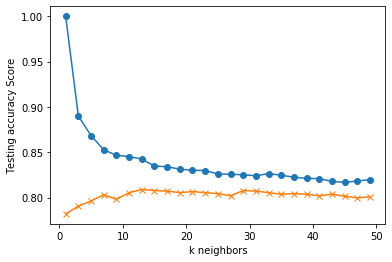

In [12]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train_encoded)
    train_score = model.score(X_train_scaled, y_train_encoded)
    test_score = model.score(X_test_scaled, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
pprint(model.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 49,
 'p': 2,
 'weights': 'uniform'}


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'leaf_size': [1, 30], 
              'n_neighbors': [1, 25, 49]} 

grid = GridSearchCV(model, param_grid, verbose=3)

In [15]:
grid.fit(X_train_scaled, y_train_encoded)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] leaf_size=1, n_neighbors=1 ......................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... leaf_size=1, n_neighbors=1, score=0.781, total=   0.5s
[CV] leaf_size=1, n_neighbors=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... leaf_size=1, n_neighbors=1, score=0.772, total=   0.5s
[CV] leaf_size=1, n_neighbors=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .......... leaf_size=1, n_neighbors=1, score=0.778, total=   0.5s
[CV] leaf_size=1, n_neighbors=25 .....................................
[CV] ......... leaf_size=1, n_neighbors=25, score=0.805, total=   1.1s
[CV] leaf_size=1, n_neighbors=25 .....................................
[CV] ......... leaf_size=1, n_neighbors=25, score=0.793, total=   1.1s
[CV] leaf_size=1, n_neighbors=25 .....................................
[CV] ......... leaf_size=1, n_neighbors=25, score=0.803, total=   1.0s
[CV] leaf_size=1, n_neighbors=49 .....................................
[CV] ......... leaf_size=1, n_neighbors=49, score=0.811, total=   1.2s
[CV] leaf_size=1, n_neighbors=49 .....................................
[CV] ......... leaf_size=1, n_neighbors=49, score=0.803, total=   1.2s
[CV] leaf_size=1, n_neighbors=49 .....................................
[CV] ......... leaf_size=1, n_neighbors=49, score=0.802, total=   1.2s
[CV] leaf_size=30, n_neighbors=1 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   10.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=49, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 30], 'n_neighbors': [1, 25, 49]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 1, 'n_neighbors': 49}
0.8050734312416555


In [17]:
model_best_param = KNeighborsClassifier(leaf_size = grid.best_params_['leaf_size'], 
                                        n_neighbors = grid.best_params_['n_neighbors'])

model_best_param.fit(X_train_scaled, y_train_encoded)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [18]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test_scaled)

print(classification_report(y_test_encoded, predictions,
                            target_names=[ 'Candidate', 'Confirmed', 'False Positive']))

                precision    recall  f1-score   support

     Candidate       0.63      0.43      0.51       411
     Confirmed       0.62      0.77      0.69       484
False Positive       0.98      1.00      0.99       853

      accuracy                           0.80      1748
     macro avg       0.74      0.73      0.73      1748
  weighted avg       0.80      0.80      0.79      1748



In [19]:
predictions = model_best_param.predict(X_test_scaled)

predictions_df=pd.DataFrame({"Actual": y_test_encoded, "Prediction": predictions, })

results=predictions_df.apply(pd.Series.value_counts)
disposition = ['False Positive', 'Confirmed', 'Candidate',] 
results['Disposition']=disposition
results

,Actual,Prediction,Disposition
2,853,868,False Positive
1,484,600,Confirmed
0,411,280,Candidate


In [20]:
import joblib
filename = 'models/knn.sav'
joblib.dump(model, filename)

['models/knn.sav']